![](https://media.architecturaldigest.com/photos/5c893eb5c2e4e32d93369a9f/master/w_1024%2Cc_limit/55-Hudson-Yards-Podium-Courtesy-Related-Oxford-Mitsui_0.jpg)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/streeteasy/streeteasy.csv
/kaggle/input/nyc-zones/zones.geojson


In [2]:
house = pd.read_csv("/kaggle/input/streeteasy/streeteasy.csv")
house.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [3]:
house.isnull().any()

rental_id           False
building_id         False
rent                False
bedrooms            False
bathrooms           False
size_sqft           False
min_to_subway       False
floor               False
building_age_yrs    False
no_fee              False
has_roofdeck        False
has_washer_dryer    False
has_doorman         False
has_elevator        False
has_dishwasher      False
has_patio           False
has_gym             False
neighborhood        False
submarket           False
borough             False
dtype: bool

In [4]:
house.dtypes

rental_id             int64
building_id           int64
rent                  int64
bedrooms            float64
bathrooms             int64
size_sqft             int64
min_to_subway         int64
floor               float64
building_age_yrs      int64
no_fee                int64
has_roofdeck          int64
has_washer_dryer      int64
has_doorman           int64
has_elevator          int64
has_dishwasher        int64
has_patio             int64
has_gym               int64
neighborhood         object
submarket            object
borough              object
dtype: object

In [5]:
rent_avg = house.groupby("neighborhood")['rent'].mean().reset_index()
rent_avg

,neighborhood,rent
0,Astoria,2541.537879
1,Battery Park City,5968.961538
2,Bay Ridge,1940.000000
3,Bedford-Stuyvesant,2827.679245
4,Boerum Hill,3067.666667
...,...,...
88,West Village,5970.970149
89,Williamsburg,3679.787582
90,Windsor Terrace,2850.000000
91,Woodhaven,1650.000000


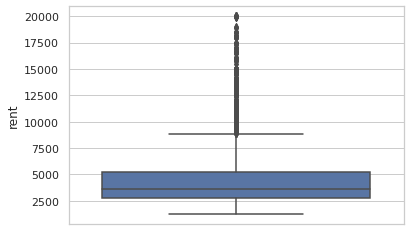

In [6]:
sns.set(style="whitegrid")
ax = sns.boxplot(y="rent", data=house)

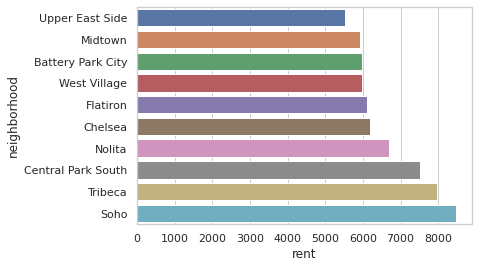

In [7]:
rent_avg_wealthy10 = rent_avg.sort_values(by=['rent']).tail(10)
sns.set(style="whitegrid")
ax = sns.barplot(x="rent", y="neighborhood", data=rent_avg_wealthy10, errwidth=30)

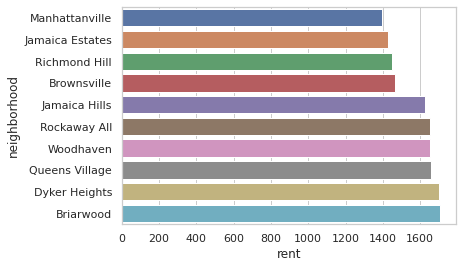

In [8]:
rent_avg_working10 = rent_avg.sort_values(by=['rent']).head(10)
sns.set(style="whitegrid")
ax = sns.barplot(x="rent", y="neighborhood", data=rent_avg_working10, errwidth=30)

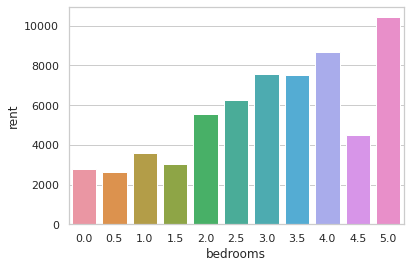

In [9]:
bedrooms = house.groupby("bedrooms")['rent'].mean().reset_index()
bedrooms_barchart = bedrooms.sort_values(by=['rent'])
sns.set(style="whitegrid")
ax = sns.barplot(x="bedrooms", y="rent", data=bedrooms_barchart, errwidth=30)

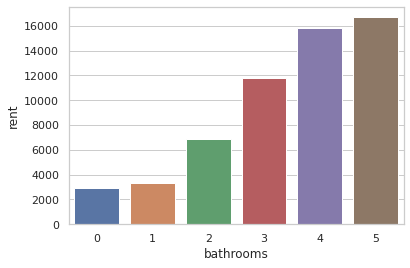

In [10]:
bathrooms = house.groupby("bathrooms")['rent'].mean().reset_index()
bathrooms_barchart = bathrooms.sort_values(by=['rent'])
sns.set(style="whitegrid")
ax = sns.barplot(x="bathrooms", y="rent", data=bathrooms_barchart, errwidth=30)

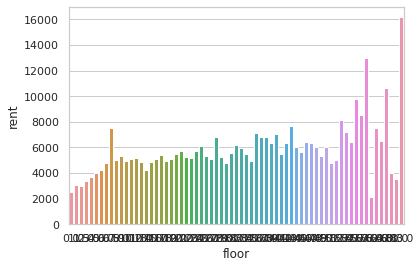

In [11]:
floor = house.groupby("floor")['rent'].mean().reset_index()
floor_barchart = floor.sort_values(by=['rent'])
sns.set(style="whitegrid")
ax = sns.barplot(x="floor", y="rent", data=floor_barchart, errwidth=30)

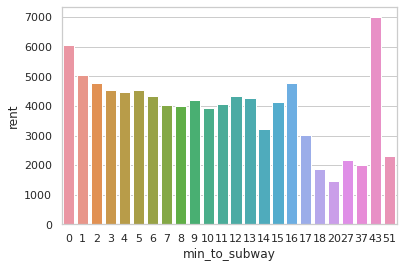

In [12]:
min_to_subway = house.groupby("min_to_subway")['rent'].mean().reset_index()
min_to_subway_barchart = min_to_subway.sort_values(by=['rent'])
sns.set(style="whitegrid")
ax = sns.barplot(x="min_to_subway", y="rent", data=min_to_subway_barchart, errwidth=30)

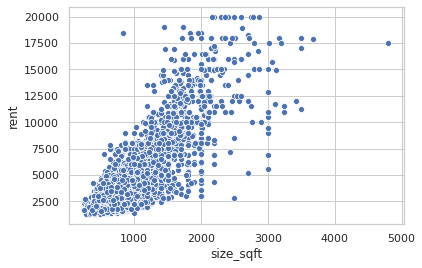

In [13]:
ax = sns.scatterplot(x="size_sqft", y="rent", data=house)

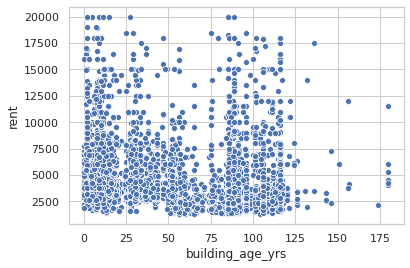

In [14]:
ax = sns.scatterplot(x="building_age_yrs", y="rent", data=house)

In [15]:
house.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [16]:
import statsmodels.api as sm
x_var = house.iloc[:, 9:17]
y_var = house[["rent"]]

In [17]:
#posative coef = if x increases, the rent increases
#negative coef = if x increases, the rent decreases
#no fee means no broker's fee is paid
lm = sm.OLS(y_var, x_var, data = house).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                   rent   R-squared (uncentered):                   0.425
Model:                            OLS   Adj. R-squared (uncentered):              0.424
Method:                 Least Squares   F-statistic:                              461.3
Date:                Thu, 13 Aug 2020   Prob (F-statistic):                        0.00
Time:                        20:49:49   Log-Likelihood:                         -48682.
No. Observations:                5000   AIC:                                  9.738e+04
Df Residuals:                    4992   BIC:                                  9.743e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

The apartents with a gym tend to be less in rent than those without a gym. Wouldn't more people want to live in an apartment that has a gym. Since the regression states that the coefficient for the gym is negative, maybe the other factors are more important.

In [18]:
print(x_var.shape)
print(y_var.shape)
X=x_var.values
y=y_var.values

(5000, 8)
(5000, 1)


In [19]:
print(X.shape)
print(y.shape)

(5000, 8)
(5000, 1)


In [20]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import Normalizer
from sklearn import neighbors
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
scaler = Normalizer().fit(X_train)
house_model = DecisionTreeClassifier()
house_model.fit(X_train, y_train)
house_preds = house_model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, house_preds))

Mean Absolute Error: 2149.12
